# Capstone 2: Narrative Analytics and Experimentation
#### Thinkful: Data Science
#### Corey Coole
#### May 27, 2019

## Introduction

### The Problem:
Firearms continue to be a leading method of murder across the United States. Data shows us that over 73% of murders commited in the year 2016 were linked to firearms.   

### The Potential Solution:

- Hypothesis: A 'Mental Health' provision reduces the amount of firearms murders 

Mental Health Provision: 
Background checks for private sales are required for at least some weapons and there is an explicit requirement for search of mental health records.

A decrease in firearm murder count is expected as the states apply the 'Mental Health' provision.

### Design of Experiment:
Compare U.S. statistics involving firearm murders, population data, and firearm provisions enacted on the state level. 
Since firearms provisions are nonstandarized bewtween all states, select two of the most similar states based on number and type of provivsions applied respectively, such that neither state applies the Mental Health provision. 
Introduce the Mental Health provision to one of state's legislature to be in affect beginning the next year. 
Observe and record the amount of murders linked to firearms in the following year.
Adjust each state's annual the murders quantities based on population growth.
Compute and test each state's ratio of annual firearm murder to total murder count with a two proportion Z-test in order to discern in the case of a difference of annual firearm murder, 
if the difference is statistically significant. 
Select a confidence level of alpha = .05 to be the indicator for successful reduction in murder total. 

### Questions to Answer:
- Does legislation help decrease the number of firearms fatalities?

- Is the Mental Health Provision effective in reducing firearms fatalities? 

### Control Group:
Arizona 2016 Firearm Provision and Murder Data

### Test Group:
Virginia 2016 Firearm Provision and Murder Data

### Metrics of Interest:
- Number of state provisions applied
- Annual state firearms murders 
- Annual state total murders
- Annual state population change
- Two proportion Z-test p-value

## Exploratory Data Anaysis

-  U.S. provision data, murder count data, and population data grouped by year and state is collected to relate a comprehensive image of the legislative and incidental nature of firearm murder in the U.S.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    
#https://www.kaggle.com/jboysen/state-firearms
df = pd.read_csv('raw_data.csv', sep=',', encoding='Latin-1') # Read the four raw .csv file, store into data frames

#https://www.kaggle.com/bryanmaloney/murders-by-method-usa-19992016/downloads/murders-by-method-usa-19992016.zip/1
df_m = pd.read_csv('murders by type.csv', sep=',', encoding='Latin-1')

#https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-total.html#par_textimage
df_US = pd.read_csv('nst-est2018-alldata.csv', sep=',') 

- The U.S. provision data contains all of the firearms provisions applied on the state level from 1991 to 2017. The list contains 133 total provisions. Not all states enact the same list of laws so we must take care that the experiment investigates two states with similar applied provisions. The list contains 133 total provisions.

- The U.S. murder data aggregates the total amount of murders commited annually grouped by state, catagorized by type of murder; firearm, cutting, unarmed, and other.

- The U.S. population data is derived from the United States Census Bureau, grouped by state and year.

## National Provision Data
- All provisions in the dataset are applied at least once, such that there are no unecessary provision catagories.
Thusly, the provision data quartiles tell us that the average amount of applied laws is 23.45, the number of maximum applied laws by a state annually is 106 and the minimum applied laws by state annually is 3.
We would like to investiate further the profiles of the these particular states.

- The full list of provisional descriptions is provided below.
The provision descriptions of the states chosen for investigation will be included later on in the report.

https://docs.google.com/spreadsheets/d/1arzySi6a-z30WXZBn9YGrjYoPC9Tgx2D23Zq4f1TQo8/edit?usp=sharing

In [3]:
df['lawtotal'].describe() # describe the quartiles, mean and standard deviation of the provision data set

count    1350.000000
mean       23.452593
std        21.677371
min         3.000000
25%        10.000000
50%        15.000000
75%        25.000000
max       106.000000
Name: lawtotal, dtype: float64

## State with most provisions applied: California
- We see that the state with the most applied firearms laws in California in 2017.

In [4]:
df_max_law_state = df[df['lawtotal'] == 106] # find the state with the most applied provisions
df_max_law_state[['state','year']]

,state,year
1304,California,2017


      Year       State  Total      Type  By Weapon
68    2004  California   2391  Firearms       1724
264   2005  California   2503  Firearms       1845
460   2006  California   2485  Firearms       1822
656   2007  California   2249  Firearms       1605
852   2008  California   2142  Firearms       1487
1048  2009  California   1972  Firearms       1360
1248  2010  California   1811  Firearms       1257
1448  2011  California   1790  Firearms       1220
1648  2012  California   1879  Firearms       1304
1848  2013  California   1745  Firearms       1224
2052  2014  California   1697  Firearms       1169
2256  2015  California   1861  Firearms       1275
2460  2016  California   1930  Firearms       1368


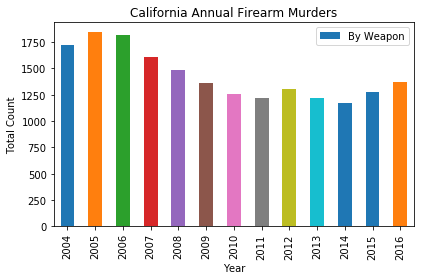

In [97]:
df_m_calif = df_m[df_m['State'] == 'California'] # take an annual firearm murder count profile of the Calif. data
df_m_calif_firearm = df_m_calif[df_m_calif['Type'] == 'Firearms']
print(df_m_calif_firearm)

df_m_calif_firearm.plot.bar(x='Year',y='By Weapon')
plt.title('California Annual Firearm Murders') 
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

- We also see that in the year 2016 (the last year of recorded murder data), the total murders linked to firearms was 1368. Also important to note the decreasing trend of murder totals starting in the year 2005 and the increasing trend beginning in 2014.

In [98]:
df_CA = df[df['state'] == 'California'] # check the Calif. data set for the 'mental health' provision
df_CA = df_CA[df_CA['year'] == 2016]
df_CA['mentalhealth']

1254    1
Name: mentalhealth, dtype: int64

- Searching the California provision data, we see that the list 2016 did include the Mental Health provision.

## State with least provisions applied: Vermont
- We see that the minimum amount of applied firearms laws occured in the state of Vermont and the state of Monatana.
Most recent data shows consistently, Vermont has the least amount of provisions applied for any state.

In [104]:
df_min_law_state = df[df['lawtotal'] == 3] # find the state with the least applied provisions
print(df_min_law_state.state.unique())
df_min_law_state[['state','year']].tail()

['Montana' 'Vermont']


,state,year
994,Vermont,2010
1044,Vermont,2011
1094,Vermont,2012
1144,Vermont,2013
1194,Vermont,2014


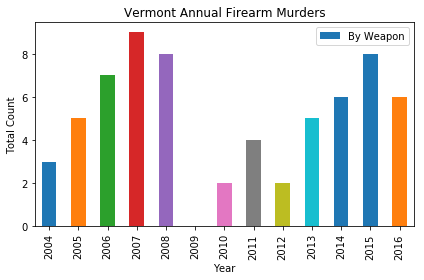

In [80]:
df_m_vermont = df_m[df_m['State'] == 'Vermont'] # take an annual firearm murder count profile of the Vermont data
df_m_vermont_firearm = df_m_vermont[df_m_vermont['Type'] == 'Firearms']
df_m_vermont_firearm

df_m_vermont_firearm.plot.bar(x='Year',y='By Weapon')
plt.title('Vermont Annual Firearm Murders') 
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

- The Vermont annual firearm murder data seems much morr chaotic than the California data, however we may expect this result given the scale, since Vermont's murder totals are comparably miniscule to the California data.

In [106]:
df_VT = df[df['state'] == 'Vermont'] # check the Vermont data set for the 'mental health' provision
df_VT = df_VT[df_VT['year'] == 2016]
df_VT['mentalhealth']

1294    0
Name: mentalhealth, dtype: int64

- We may also expect that Vermont's short list does not contain the Mental Health provision.
Comparing these two states outlines how truly important the dynamics of respective demographics are to the overall application and effectiveness of what provisions a state chooses the enact. The thesis of this experiment is to potentially capture one such relationship between the specified firearms law and state-provisional profile. 

## Main Analysis / Objective

- To demonstrate the experiment, data from the most latest year of murder records is chosen; 2016
- Arizona, 2016 data is chosen as the control group, such that this state and 2016 does not apply the Mental Health provision.
- The investigation for a similar state profile continues below.

In [ ]:
def todf(data,time,loc): # method to create a data frame of a given year and state
    df_state = data[data['state'] == loc] 
    df_state = df_state[df_state['year'] == time]
    return(df_state)

In [136]:
df_AZ = todf(df,2016,'Arizona') # create 2016,AZ data frame, find all applied (nonzero) provisions in that year
nonzero_AZ = df_AZ[df_AZ!=0]
nonzero_AZ_drop = nonzero_AZ[nonzero_AZ.columns[~nonzero_AZ.isnull().all()]]
nonzero_AZ_drop.T
df_AZ_cols = pd.DataFrame(nonzero_AZ_drop.columns.tolist())
df_AZ_cols.rename(columns={0: 'AZ'})

,AZ
0,state
1,year
2,age18longgunpossess
3,ccbackground
4,ccrenewbackground
5,ccrevoke
6,danger
7,felony
8,invcommitment
9,invoutpatient


In [114]:
df_AZ['lawtotal'] # take a count of how many provisions were applied in AZ, 2016

1252    11
Name: lawtotal, dtype: int64

In [115]:
df_AZ['mentalhealth'] # check that the 'mental health' provision was not applied in 2016(state is valid for experiment)

1252    0
Name: mentalhealth, dtype: int64

- We see that Arizona had 11 applied firearms provisions in 2016 and did not include the Mental Health law that year.

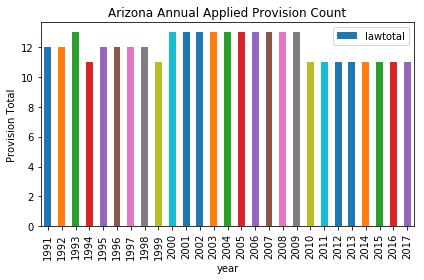

In [121]:
df_az = df[df['state'] == 'Arizona'] # take a profile of AZ historically applied provision total
df_provisions_total = df_az[['year','lawtotal']]
df_provisions_total.plot.bar(x='year', y='lawtotal')
plt.title('Arizona Annual Applied Provision Count')
plt.ylabel('Provision Total')
plt.tight_layout()
plt.show()

- The bar chart depicts the totals of applied provisions dating back to 1991, we see that Arizona ranges from 11 to 13 provisiion historically. We will choose a state in our specified year of 2016 that carries a similar provision profile. 

In [122]:
df_lawtotal = df[['year','state','lawtotal']] # find states that are close to AZ's historical provision totals
df_lawtotal = df_lawtotal[df_lawtotal['year'] == 2016]
df_lawtotal.query('11 <= lawtotal <= 13')

,year,state,lawtotal
1252,2016,Arizona,11
1253,2016,Arkansas,11
1263,2016,Indiana,12
1267,2016,Louisiana,12
1268,2016,Maine,12
1289,2016,South Carolina,12
1293,2016,Utah,11
1295,2016,Virginia,13


In [94]:
def compare(df1,df2): # method to compare two states by the difference in their applied provision 
                      # returns a ratio of the sum of the unique provisions to the shared total. 
    nonzero_1 = df1[df1!=0]
    nonzero_1_drop = nonzero_1[nonzero_1.columns[~nonzero_1.isnull().all()]]
    nonzero_1_drop.T
    df_1_cols = pd.DataFrame(nonzero_1_drop.columns.tolist())

    
    nonzero_2 = df2[df2!=0]
    nonzero_2_drop = nonzero_2[nonzero_2.columns[~nonzero_2.isnull().all()]]
    nonzero_2_drop.T
    df_2_cols = pd.DataFrame(nonzero_2_drop.columns.tolist())
    

    df_compare = pd.concat([df_1_cols, df_2_cols]) # concat dataframes
    df_compare = df_compare.reset_index(drop=True) # reset the index

    df_gpby = df_compare.groupby(list(df_compare.columns)) #group by#
    idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1] #reindex
    return("compared = {}".format(len(idx)/(len(df_1_cols)+len(df_2_cols))))

- The function 'compare' creates two separate state dataframes that list the applied provisions in the year 2016 respectively and returns a ratio of the total different provisions between the two states by the sum total applied provisions in each state. The closer to zero the measurement is, the more similar the state profiles are.

In [129]:
compare(todf(df,2016,'Arizona'),todf(df,2016,'Arizona')) # chack that 'compare' method result is true

'compared = 0.0'

In [128]:
compare(todf(df,2016,'Arizona'),todf(df,2016,'Arkansas'))

'compared = 0.35714285714285715'

In [123]:
compare(todf(df,2016,'Arizona'),todf(df,2016,'Indiana'))

'compared = 0.3793103448275862'

In [124]:
compare(todf(df,2016,'Arizona'),todf(df,2016,'Louisiana'))

'compared = 0.5172413793103449'

In [125]:
compare(todf(df,2016,'Arizona'),todf(df,2016,'Maine	'))

'compared = 1.0'

In [126]:
compare(todf(df,2016,'Arizona'),todf(df,2016,'South Carolina'))

'compared = 0.4482758620689655'

In [127]:
compare(todf(df,2016,'Arizona'),todf(df,2016,'Utah'))

'compared = 0.42857142857142855'

In [17]:
compare(todf(df,2016,'Arizona'),todf(df,2016,'Virginia')) # find that Virginia has most provisional overlap to AZ

'compared = 0.3333333333333333'

In [90]:
df_VA = todf(df,2016,'Virginia') # check that Virginia has no applied 'mental health' provision during 2016
df_VA['mentalhealth']

1295    0
Name: mentalhealth, dtype: int64

- We see that in 2016, the most similar state to Arizona's profile is Virginia. 
Virginia is also found to not apply the Mental Health provision in 2016.

- This demonstration finds the state of Virginia, 2016 data sufficiently similar to Arziona, 2016 data and select Virginia as the test group.

### Applied Provision Data 
- The following sections of the experimnet demonstration depict what methods would best compare the applied provisions with respect to state. These methods would be used to calculate the statistical difference in murder data given the introduction of the Mental Health firearm regulation. 

In [135]:
def show_nonzero(df): # list all applied provisions between AZ and VA
    nonzero_1 = df[df!=0]
    nonzero_1_drop = nonzero_1[nonzero_1.columns[~nonzero_1.isnull().all()]]
    nonzero_1_drop.T
    df_1_cols = pd.DataFrame(nonzero_1_drop.columns.tolist())
    #df_1_cols = df_1_cols.rename(columns={0: 'AZ'})
    return(df_1_cols.iloc[2:14])

AZ_nonzero = show_nonzero(todf(df,2016,'Arizona')).rename(columns={0: 'AZ'})
VA_nonzero = show_nonzero(todf(df,2016,'Virginia')).rename(columns={0: 'VA'})
AZ_nonzero.join(VA_nonzero)

,AZ,VA
2,age18longgunpossess,ccbackground
3,ccbackground,ccrenewbackground
4,ccrenewbackground,ccrevoke
5,ccrevoke,danger
6,danger,dvro
7,felony,elementary
8,invcommitment,felony
9,invoutpatient,invcommitment
10,mcdv,invoutpatient
11,mcdvdating,nosyg


- We see the significant over lap in state provsion profiles, the descriptions of this provision list is detailed below.

### State Provision Descriptions
#### age21handgunpossess: 
No possession of handguns until age 21
#### ccbackground: 
Concealed carry permit process requires a background check
#### ccrenewbackground: 
Concealed carry permit renewal requires a new background check
#### ccrevoke: 
Authorities are required to revoke concealed carry permits under certain circumstances
#### danger: 
Firearm possession is prohibited if person is deemed by court to be a danger to oneself or others
#### dvro: 
State law automatically prohibits domestic violence-related restraining order (DVRO) subjects from possessing firearms
#### elementary: 
No gun carrying on elementary school property, including concealed weapons permittees
#### felony: 
Firearm possession is prohibited for people with a felony conviction
#### invcommitment: 
Firearm possession is prohibited for people who have been involuntarily committed to an inpatient facility
#### invoutpatient: 
Firearm possession is prohibited for people who have been involuntarily committed to an outpatient facility
#### mcdv: 
People convicted of a misdemeanor crime of domestic violence against a spouse, ex-spouse, or cohabitating partner are prohibited from possessing firearms
#### nosyg: 
Use of deadly force is not allowed to be a first resort in public. This is sometimes referred to as a "stand your ground" law. There is a duty to retreat. Does not count as shoot first law if it only applies when person is in a vehicle. (A state with a stand your ground law is coded as a 0. All other states are coded as a 1)
#### permitconcealed: 
Permit required to carry concealed weapons
#### stalking: 
A stalking conviction is prohibitive for firearm possession
#### traffickingprohibited: 
No person may purchase a firearm with the intent to re-sell to a person who is prohibited from buying or possessing a firearm


### State Murder Data

In [91]:
def df_murder_count(data,time,loc,weapon): # from the murder count data set, extract 2016 firearm counts for each state 
    df_state = data[data['State'] == loc] 
    df_state = df_state[df_state['Year'] == time]
    df_state = df_state[df_state['Type'] == weapon]
    return(df_state)

df_murder_count(df_m,2016,'Arizona','Firearms')

df_state_fm = pd.concat([df_murder_count(df_m,2016,'Arizona','Firearms'), df_murder_count(df_m,2016,'Virginia','Firearms')])
df_state_fm

,Year,State,Total,Type,By Weapon
2452,2016,Arizona,336,Firearms,227
2628,2016,Virginia,482,Firearms,352


- Grouping the murder data between the two states, we see that Arizona had 336  recorded murders in 2016, 227 of which were linked to firearms. In the same year, Virginia had 482 recorded murders, 352 of which were linked to some type of firearm. 

/Users/coreycoole/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


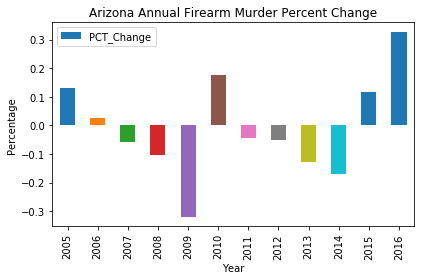

In [83]:
df_m_AZ = df_m[df_m['State'] == 'Arizona'] # take a historical profile of the AZ firearm count data as a 
                                           # annual percent change value from the previous year
df_m_AZ_firearms = df_m_AZ[df_m_AZ['Type'] == 'Firearms']
df_m_AZ_firearms['PCT_Change'] = df_m_AZ_firearms['By Weapon'].pct_change(periods=1)

df_m_AZ_firearms_no2004 = df_m_AZ_firearms.iloc[1:13, :]

df_m_AZ_firearms_no2004.plot.bar(x='Year', y='PCT_Change')
plt.title('Arizona Annual Firearm Murder Percent Change') 
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

/Users/coreycoole/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


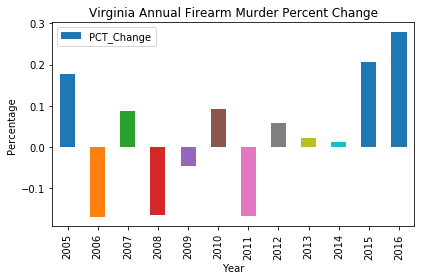

In [84]:
df_m_VA = df_m[df_m['State'] == 'Virginia'] # take a historical profile of the AZ firearm count data
                                            # as a annual percent change value fromthe previous year
df_m_VA_firearms = df_m_VA[df_m_VA['Type'] == 'Firearms']          
df_m_VA_firearms['PCT_Change'] = df_m_VA_firearms['By Weapon'].pct_change(periods=1)

df_m_VA_firearms_no2004 = df_m_VA_firearms.iloc[1:13, :]

df_m_VA_firearms_no2004.plot.bar(x='Year', y='PCT_Change')
plt.title('Virginia Annual Firearm Murder Percent Change')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

- Analyzing the historical firearm murder data, the percentage changes in the Arizona data make disticnt trends, however Virginia's percentage chart seems much more irregular. Each state's rates of change will be useful in determining the effectiveness of applying the Mental Health provision.

### Arizona Population Data
- There is a wide array of factors that contribute to annual murder counts, let alone data specific to firearms. However, if we are to compare two groups, we would like to eliminate the variability of group size respectively, such that we adjust each state's total murder and firearm murder counts by the population growth that year.

In [28]:
df_US_annual_population = df_US[['NAME','CENSUS2010POP','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013',
                                 'POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017',
                                 'POPESTIMATE2018']]
                                                            # create a data frame of AZ annual population estimates
df_AZ_population = df_US_annual_population[df_US_annual_population['NAME'] == 'Arizona']
df_AZ_pop = df_AZ_population.T
df_AZ_pop.columns = ['Population']
df_AZ_pop = df_AZ_pop.iloc[1:9]
df_AZ_pop


,Population
CENSUS2010POP,6392017
POPESTIMATE2011,6473497
POPESTIMATE2012,6556629
POPESTIMATE2013,6634999
POPESTIMATE2014,6733840
POPESTIMATE2015,6833596
POPESTIMATE2016,6945452
POPESTIMATE2017,7048876


                 Population
POPESTIMATE2011    0.012747
POPESTIMATE2012    0.012842
POPESTIMATE2013    0.011953
POPESTIMATE2014    0.014897
POPESTIMATE2015    0.014814
POPESTIMATE2016    0.016369
POPESTIMATE2017    0.014891


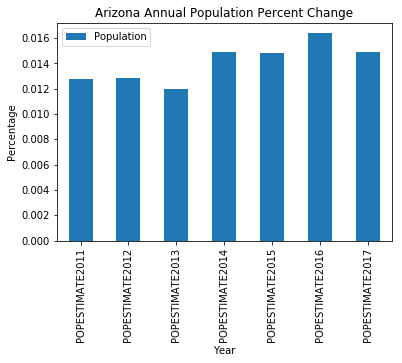

In [88]:
df_AZ_pop_pct_changes = df_AZ_pop.pct_change() # take a profile of the AZ population change as a percent change 
                                               # from the previous year 
df_AZ_pop_pct_changes_no2010 = df_AZ_pop_pct_changes.iloc[1:9,:]
df_AZ_pop_pct_changes_no2010.plot.bar()
plt.title('Arizona Annual Population Percent Change') 
plt.ylabel('Percentage')
plt.xlabel('Year')
print(df_AZ_pop_pct_changes_no2010)


### Virginia Population Data

In [31]:
df_VA_population = df_US_annual_population[df_US_annual_population['NAME'] == 'Virginia']
                                                    # create a data frame of AZ annual population estimates
df_VA_pop = df_VA_population.T
df_VA_pop.columns = ['Population']
df_VA_pop = df_VA_pop.iloc[1:9]
df_VA_pop

,Population
CENSUS2010POP,8001024
POPESTIMATE2011,8100469
POPESTIMATE2012,8185229
POPESTIMATE2013,8253053
POPESTIMATE2014,8312076
POPESTIMATE2015,8362907
POPESTIMATE2016,8410946
POPESTIMATE2017,8465207


                 Population
POPESTIMATE2011    0.012429
POPESTIMATE2012    0.010464
POPESTIMATE2013    0.008286
POPESTIMATE2014    0.007152
POPESTIMATE2015    0.006115
POPESTIMATE2016    0.005744
POPESTIMATE2017    0.006451


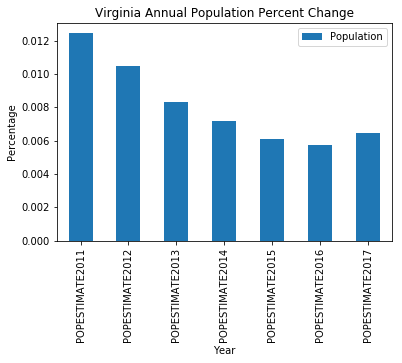

In [87]:
df_VA_pop_pct_changes = df_VA_pop.pct_change() # take a profile of the VA population change as a percent change 
                                               # from the previous year 
df_VA_pop_pct_changes_no2010 = df_VA_pop_pct_changes.iloc[1:9,:]
df_VA_pop_pct_changes_no2010.plot.bar()
plt.title('Virginia Annual Population Percent Change')
plt.ylabel('Percentage')
plt.xlabel('Year')
print(df_VA_pop_pct_changes_no2010)


### Adjusted Count Data

In [92]:
df_state_fm['Ajstd Firearm'] = [227/1.016369, 352/1.005744] # standardize the firearm and total murder count 
                                                            # by each state's respective population growth
df_state_fm['Ajstd Total'] = [336/1.016369, 482/1.005744]
df_state_fm

,Year,State,Total,Type,By Weapon,Ajstd Firearm,Ajstd Total
2452,2016,Arizona,336,Firearms,227,223.344081,330.588595
2628,2016,Virginia,482,Firearms,352,349.989659,479.247204


- Although the population adjustment did not change the murder counts very much, this calculation can be generalized such to compare states that might be much different in size. 
From here, a two proportion Z-test is applied to the ratios of firearm to total murder data.

In [57]:
from statsmodels.stats.proportion import proportions_ztest # test each standardized ratio for a 
                                                           # statistical significance result

count = np.array([223.344081, 349.989659])
n_observations = np.array([330.588595, 479.247204])

stat, pval = proportions_ztest(count,n_observations )
print('p-value = {} and Z-score = {}'.format(pval,stat))

p-value = 0.09247547501022205 and Z-score = -1.682481677097897


#### Our test results indicate at probability value of .0924, greater than our alpha level at .05. Thusly the metrics show our the difference in the murder count data is not statistically significant. 

### Conclusion

In this experimental demonstration, the 2016 Arziona firearm murder annual count data was chosen as the control group and the 2016 Virginia firearm murder annual murder count data was chosen as the test group. To investigate the effectiveness of the Mental Health provision, the state of Virginia would adopt the Mental Health regulation throughout the upcoming year and the annual murder count would then be recorded as usual. After the year, the Virginia firearm murder count would be calculated as a ratio to the total murder count of the state and the Arizona firearm murder count would be also made a ratio to its state total murder count. Each ratio would then be standardized with respect to state population estimates taken from the US Census Bureau. These two standardized ratios would be then be compared with a two proportion z-test. With a confidence level set to .05, a successful experiment would see a resulting p-value less than .05, thus a statistically significant difference in the annual murder counts from each state. 

Through careful investigation of the Arizona and Viginia provision, murder, and population data, this experiment is suited to address the application of a new firearm provision to the test case. Although the experiment demonstation did not meet the requirement for success, I feel the calculations of this A/B experiment is readily generatlized to examine the introduction of any unapplied firearm provisions. 
Due to the approach of the A/B experiment, we see how important to select a control and testing group with minimal differences in variable profiles, such that all recorded changes can be best traced to the experimental metric. 

Further refinement of this experimental method may include non-parametric ratio testing, such that the underlying distributions of murder and population data are better handled. As state-wide population data generalizes a large number of demographics, this experiment would benefit from testing sub-group murder data and within the general population data in order to better determine the effectiveness of an experimental provision. Since this particular A/B is structured such that it determines if the two groups murder counts are statistically different, a natural supplement to this method would be, in light of a successful result, to then test each state's historical murder data and population growth to determine if murder counts increased or decreased annually during the observed time period. 